Predict Stock Prices Using Random Forest Regression Model in Python

In [1]:
#1. Import libraries
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#2.Import the dataset
sp500data = yf.download("INFY", start="2020-01-01", end="2022-06-23")
sp500_df = pd.DataFrame(sp500data)
sp500_df.to_csv("sp500_data.csv")

[*********************100%***********************]  1 of 1 completed


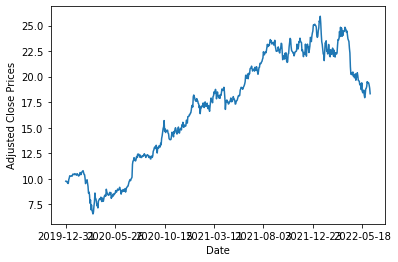

In [3]:
# 3.Visualize the data
read_df = pd.read_csv("sp500_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [4]:
# 4.Data Pre-processing

# Step 1: Read the file and set the date as the index.
df = pd.read_csv("sp500_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)


In [5]:
# Step 2: Feature selection
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values
# x.shape
# y.shape

In [6]:
# Step 3: Divide into train and test datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

In [7]:
# Step 4: Scaling the features
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [16]:
#step 4.1:Hyperparamater tuning
'''The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster.'''
'''The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster.'''
grid_rf = {
       'n_estimators': [20, 50, 100, 500, 1000],  
        'max_depth': np.arange(1, 15, 1),  
        'min_samples_split': [2, 10, 9], 
        'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
        'bootstrap': [True, False], 
        'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator= model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

NameError: name 'model' is not defined

In [17]:
# 5.Apply model and predict
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[ 7.78604736 25.35722448 13.71730898 16.1155159  11.78605011 18.17985234
 22.18461548 20.50778966 23.49644793 21.99159127  9.55021959 19.28614519
 23.6784286  13.96137077 18.17586556 24.91184214 22.4833963  20.65328428
 16.00766957 23.1631831  22.98413199 20.10337175 12.09542812 22.19727644
 13.24638651 18.16259588  6.83682378 18.91329715 17.24392676 13.41073095
 14.98289635 14.48124114 16.25791418 10.37258696 12.89752877 18.11470411
 22.70448791 18.86885789 14.76071615  8.45779917 21.87076741  8.46011679
 23.16146333 18.73402938  7.12911804 22.83030799 13.83085835 10.42868305
 13.89574108 17.72213296 12.09579593 17.33738425 25.03534148  9.76548271
 23.89589394 24.46536464 22.56356496 17.90503537 18.39749973  8.07462654
 18.95681165 12.23890939 19.89641781  7.86891068 10.2870507  22.89728639
 22.4297024  10.36691328 22.26003306 18.68359438 20.60489514 14.93276896
 20.16543267 14.659356   14.38147946 19.39370823 23.15757395 10.45687328
  8.90682804 13.09670251 23.82921873 10.70812322 20

In [18]:
predict.shape

(161,)

In [19]:
# 6. Statistical metrics and performance evaluation
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.0384
Mean Squared Error: 0.0036
Root Mean Squared Error: 0.0597
(R^2) Score: 0.9999
Train Score : 100.00% and Test Score : 99.99% using Random Tree Regressor.
Accuracy: 99.71 %.


In [20]:
# 7. Collect future days from predicted values and plot
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

Buy price and date
            Predictions
Date                   
2022-07-06     6.836824
Sell price and date
            Predictions
Date                   
2022-06-11    25.357224


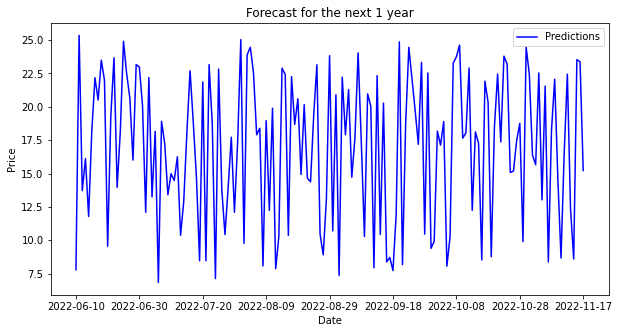

In [22]:
# One year prediction
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Buy price and date
            Predictions
Date                   
2022-06-10     7.786047
Sell price and date
            Predictions
Date                   
2022-06-11    25.357224


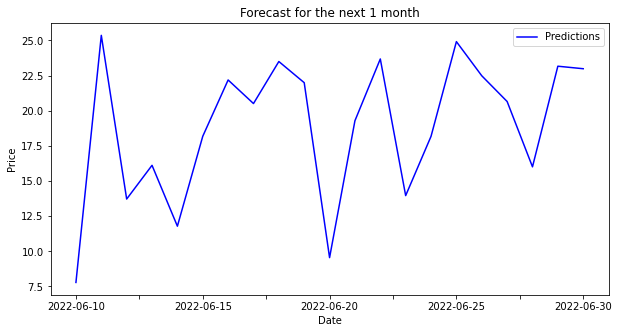

In [23]:
# One month prediction:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred.set_index("Date", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Buy price and date
            Predictions
Date                   
2022-06-10     7.786047
Sell price and date
            Predictions
Date                   
2022-06-11    25.357224


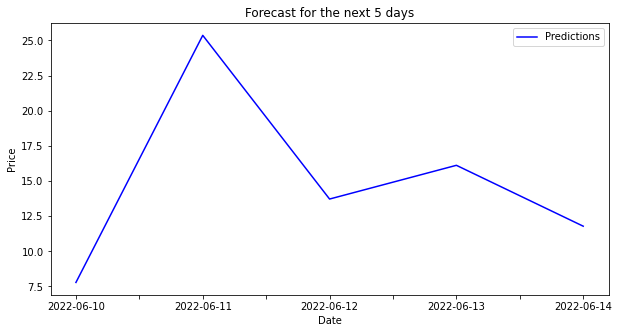

In [24]:
# Five days prediction :

fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
fivedays_df_pred.set_index("Date", inplace=True)
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()




In [ ]:
# import math
# graph=predictions.head(20)